In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df=pd.read_csv('uber.csv')

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.shape

(200000, 9)

In [7]:
df=df.drop(['Unnamed: 0','key'],axis=1)

In [8]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(199999, 7)

In [11]:
df = df.loc[df["pickup_longitude"]>=-180]
df = df.loc[df["pickup_longitude"]<=180]
df = df.loc[df["pickup_latitude"]>=-90]
df = df.loc[df["pickup_latitude"]<=90]
df = df.loc[df["dropoff_longitude"]>=-180]
df = df.loc[df["dropoff_longitude"]<=180]
df = df.loc[df["dropoff_latitude"]>=-90]
df = df.loc[df["dropoff_latitude"]<=90]

In [12]:
df.shape

(199987, 7)

In [19]:
#haversine distance
def distance_transform(longitude1,latitude1,longitude2,latitude2):
    long1,lati1,long2,lati2=map(np.radians,[longitude1,latitude1,longitude2,latitude2])
    dist_longitude=long2-long1
    dist_latitude=lati2-lati1
    a=np.sin(dist_latitude/2)**2 + np.cos(lati1)*np.cos(lati2)*np.sin(dist_longitude/2)**2
    c=2*6371*np.arcsin(np.sqrt(a))
    return c

In [20]:
df['Distance']= distance_transform( df['pickup_longitude'], df['pickup_latitude'], 
                                   df['dropoff_longitude'],df['dropoff_latitude'])

In [21]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


Text(0, 0.5, 'fare_amount')

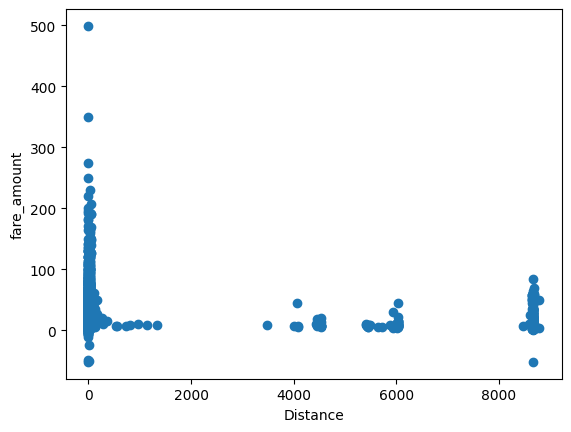

In [22]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [23]:
df = df.loc[df['fare_amount']>0]
df = df.loc[df['Distance']>0]
df = df.loc[df['Distance']<70]
df.shape

(193857, 8)

Text(0, 0.5, 'fare_amount')

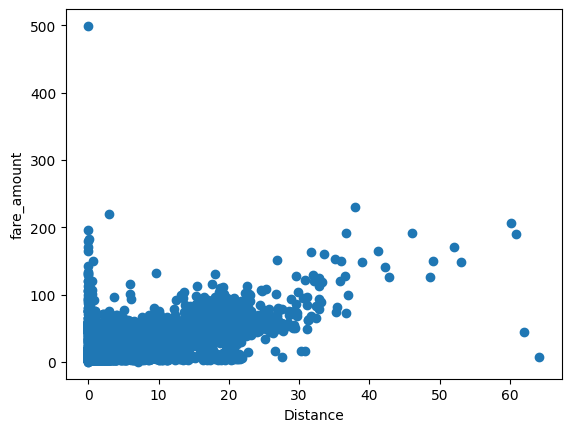

In [24]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

/tmp/ipykernel_39101/3065595379.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


<AxesSubplot: >

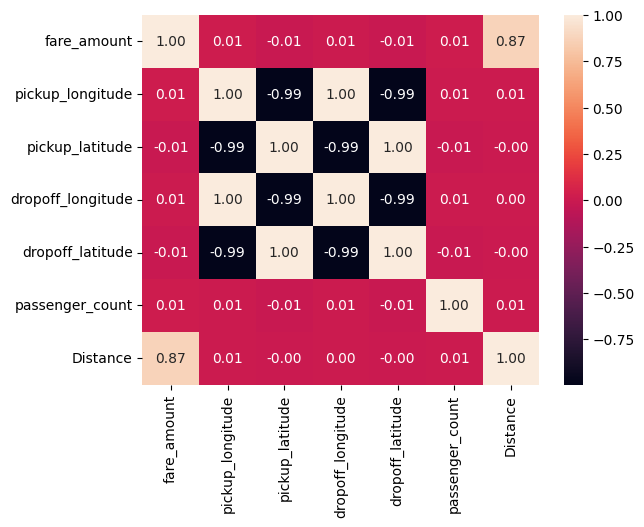

In [25]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [26]:
x = df['Distance'].values.reshape(-1,1)
y = df['fare_amount'].values.reshape(-1,1)

ss = StandardScaler()
x_st = ss.fit_transform(x)
y_st = ss.fit_transform(y)

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x_st, y_st, test_size=0.2, random_state=42)

In [28]:
lr = LinearRegression()
rf = RandomForestRegressor()

In [29]:
lr.fit(xtrain,ytrain)
rf.fit(xtrain,ytrain)

/tmp/ipykernel_39101/1446996702.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


RandomForestRegressor()

In [30]:
lr_pred = lr.predict(xtest)
rf_pred = rf.predict(xtest)

In [31]:
print(f"Coefficient:{lr.coef_} Intercept:{lr.intercept_}")

Coefficient:[[0.8694432]] Intercept:[-0.00038648]


In [34]:
print("Linear Regression")
print("MAE:", mean_absolute_error(ytest,lr_pred))
print("MSE:", mean_squared_error(ytest,lr_pred))
print("RMSE", np.sqrt(mean_squared_error(ytest,lr_pred)),"\n")

print("Random Forest Regression")
print("MAE:", mean_absolute_error(ytest,rf_pred))
print("MSE:", mean_squared_error(ytest,rf_pred))
print("RMSE", np.sqrt(mean_squared_error(ytest,rf_pred)))

Linear Regression
MAE: 0.24242896988112872
MSE: 0.2379950077864864
RMSE 0.48784732015917276 

Random Forest Regression
MAE: 0.2914608013258209
MSE: 0.30912530714259784
RMSE 0.5559903840378877
